# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

### Solution:

Using natural units (i.e. $a_0 = 1$) the formulae for $\left| \Psi_{\text{1,0,0}} (x,y,z) \right|^2$ and $\left| \Psi_{\text{2,1,0}} (x,y,z) \right|^2$ simplify to:

$$\left| \Psi_{\text{1,0,0}} (x,y,z) \right|^2 \propto e^{-2r}$$

$$\left| \Psi_{\text{2,1,0}} (x,y,z) \right|^2 \propto r^2 e^{-r} \cos^2{\theta}$$

constant normalization factors can be ignored, as they are simplified anyway when the acceptance probability is computed. Now $\theta$, in spherical coordinates, is equivalent to $\arccos{z/r}$, so the formula can be further simplified to:

$$\left| \Psi_{\text{2,1,0}} (x,y,z) \right|^2 \propto r^2 e^{-r} \frac{z^2}{r^2} = z^2 e^{-r}$$

Using these two formulae I sampled the two orbitals using Metropolis algorithm, simulating one million steps (divided in the usual 1000 blocks) of the same walker. Here I started my random walk in the origin for both orbitals: given the fact that both formulae are symmetric with respect to the origin, I can assume the system to be already in equilibrium and I start sampling immediately.

But first, in order to satisfy the $50\%$ rule, I did 50 trials using all the possible step lengths starting from $0.1$ and finishing at $5.0$ (each time increasing the step length by $0.1$). Each trial was a random walk of 1000 steps. I chose the step length that resulted in the acceptance rate to be the closest to $50\%$. Now, due to the fact that each length was tried only once, and considering that I chose a granularity of $0.1$, I can't be absolutely sure that the selected step length is the absolute best. However, I can be pretty sure it is good enough to satisfy the empirical $50\%$ rule, and avoid correlation problems. The selected lengths for the $1s$ and $2p$ orbitals have then been used in the Metropolis algorithm.

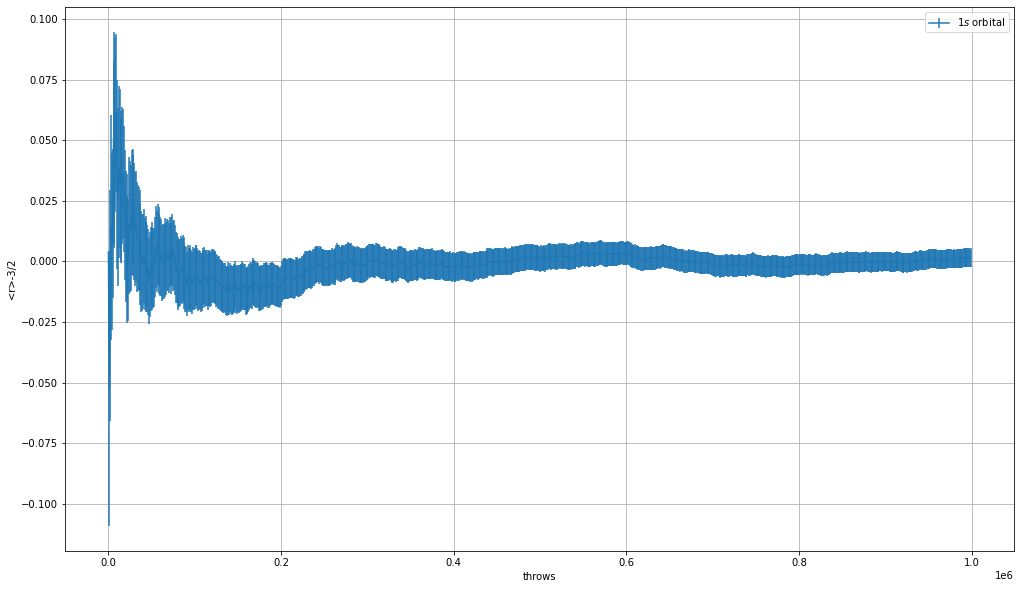

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

data = pd.read_csv('output.dat', delimiter='\t', header=None, names=['s', 's_sigma', 'p', 'p_sigma'])
data_100 = pd.read_csv('output_100.dat', delimiter='\t', header=None, names=['x', 'y', 'z', 'r'])
data_210 = pd.read_csv('output_210.dat', delimiter='\t', header=None, names=['x', 'y', 'z', 'r'])

N=len(data['s'])
L=1000
x = np.arange(N)      # [0,1,2,...,N-1]
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.figure(figsize=(17,10))
plt.errorbar(x, data['s'] - 1.5, yerr=data['s_sigma'], alpha=1.0, label='$1s$ orbital')
plt.xlabel('throws')
plt.ylabel('<r>-3/2')
plt.grid(True)
plt.legend()
plt.show()

with step length $1.3$

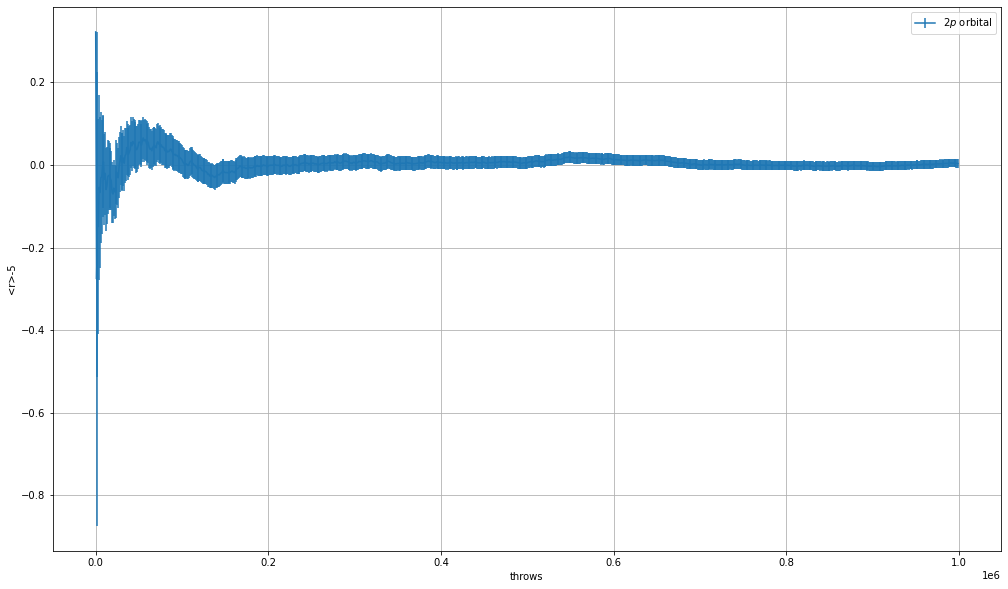

In [2]:
plt.figure(figsize=(17,10))
plt.errorbar(x, data['p'] - 5, yerr=data['p_sigma'], alpha=1.0, label='$2p$ orbital')
plt.xlabel('throws')
plt.ylabel('<r>-5')
plt.grid(True)
plt.legend()
plt.show()

with step length $2.8$

Both results are compatible with the theoretical values, which justifies *a posteriori* the assumption of equilibrium. In fact, just by plotting the shapes of the two orbitals:

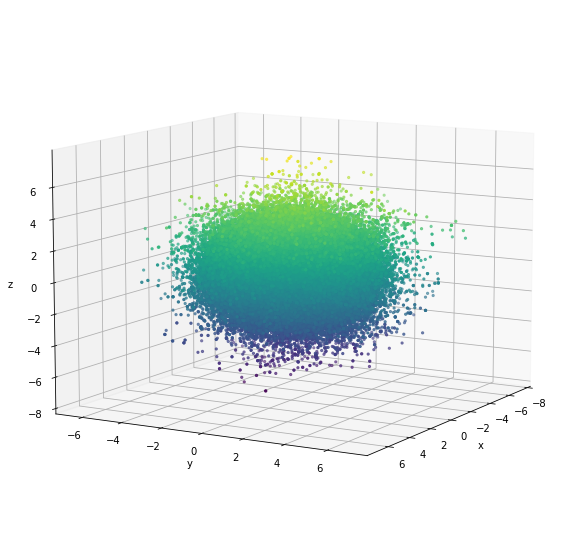

In [3]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_100['x'], data_100['y'], data_100['z'], c=data_100['z'], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

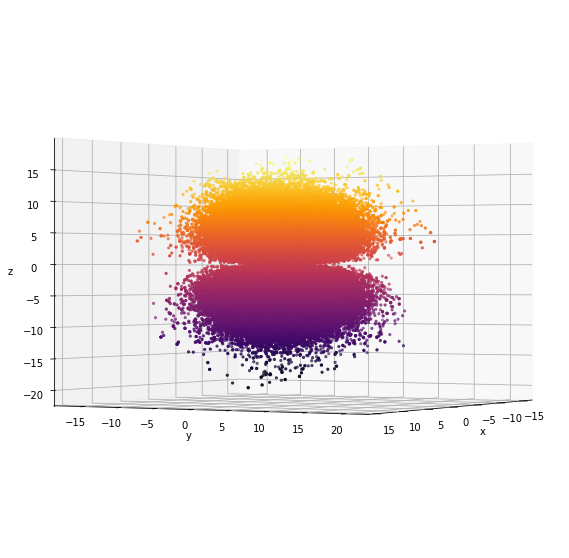

In [4]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_210['x'], data_210['y'], data_210['z'], c=data_210['z'], cmap='inferno', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30)

plt.show()

We can se that the $1s$ orbital is, as expected, just a sphere centered in the origin, with the density of sampled points decreasing as the distance from the origin increases, while the $2p$ orbital features two distinct lobes along the $z$ axis, which are, however, close enough to the origin to allow the path of the random walk to freely jump from one lobe to the other.

Now, for this computation I simulated one million Metropolis steps and divided them in $1000$ blocks of size $1000$, as usual. I assumed a block size of $1000$ to be large enough to avoid any correlation problems, but to verify that I also computed the autocorrelation function for this process, which I then fit to the exponential function $\exp{\{-x/\tau\}}$. The value of $\tau$ gives an indication of the memory length of the process.

In [5]:
def expo(x, tau):
    return np.exp(-x/tau)

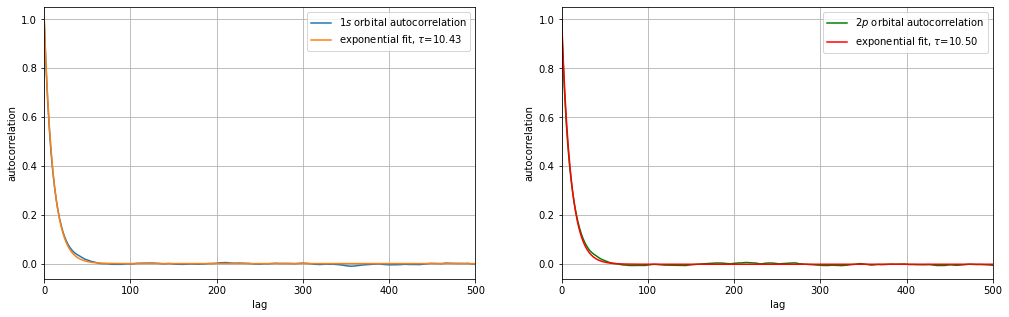

In [6]:
from scipy.optimize import curve_fit

data_autoc = pd.read_csv('output_autoc.dat', delimiter='\t', header=None, names=['s', 'p'])

lag = np.arange(len(data_autoc['s']))
sfit, scov = curve_fit(expo, lag, data_autoc['s'])
sfit=sfit[0]
pfit, pcov = curve_fit(expo, lag, data_autoc['p'])
pfit=pfit[0]

fig_ac, axs_ac = plt.subplots(1, 2, figsize=(17,5))
axs_ac[0].plot(data_autoc['s'], alpha=1.0, label='$1s$ orbital autocorrelation')
axs_ac[0].plot(lag, expo(lag, sfit), label=r'exponential fit, $\tau$=' + f'{sfit:.2f}')
axs_ac[1].plot(data_autoc['p'], color='green', alpha=1.0, label='$2p$ orbital autocorrelation')
axs_ac[1].plot(lag, expo(lag, pfit), color='red', label=r'exponential fit, $\tau$=' + f'{pfit:.2f}')
for a in axs_ac:
    a.set_xlabel('lag')
    a.set_ylabel('autocorrelation')
    a.set_xlim((0,500))
    a.grid(True)
    a.legend()
plt.show()

For both processes i get a value of $\tau$ slightly bigger that $10$, which justifies _a posteriori_ my assumption and confirms that $1000$ is a sufficiently big block size for this process.

Now let's consider what happens when the starting point is far away from the origin. I chose ($100.3$, $73.0$, $-37.901$) as a starting point for both orbitals. Using the same step lengths as before, I simulated a one million step long random walk for each orbital.

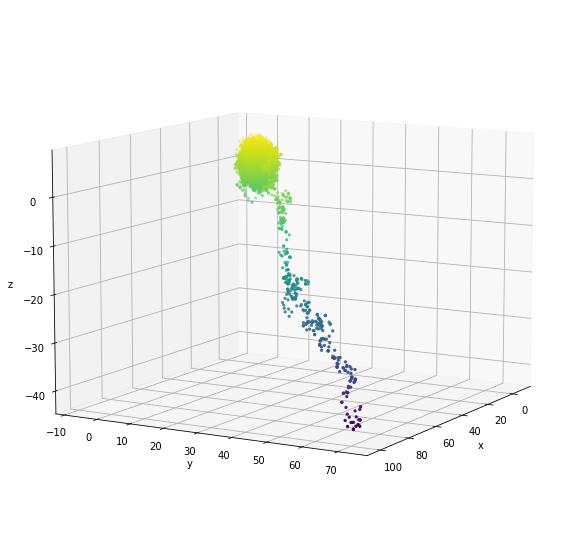

In [7]:
data_far_100 = pd.read_csv('output_100_far.dat', delimiter='\t', header=None, names=['x', 'y', 'z', 'r'])

fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_far_100['x'], data_far_100['y'], data_far_100['z'], c=data_far_100['z'], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

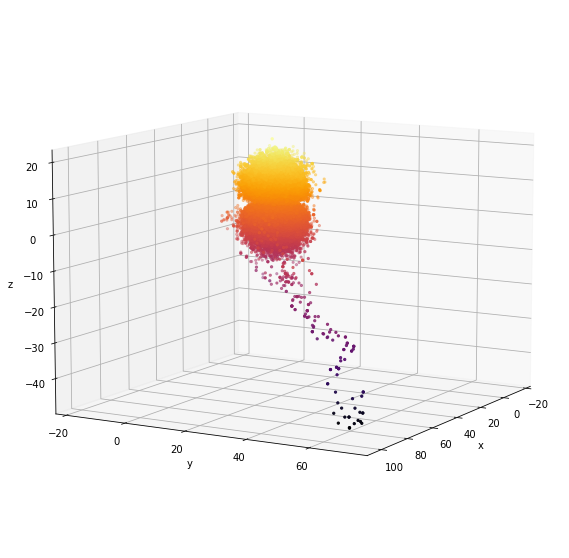

In [8]:
data_far_210 = pd.read_csv('output_210_far.dat', delimiter='\t', header=None, names=['x', 'y', 'z', 'r'])

fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_far_210['x'], data_far_210['y'], data_far_210['z'], c=data_far_210['z'], cmap='inferno', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

In both cases, the random walk slowly crawls towards the position of the lobe(s), and only then it begins to sample the wavefunction. It would be irresponsible to include this first part of the path in the computation of $\left< r \right>$, as its not relevant data! To know when the system has effectively reached equilibrium, and therefore when to start collecting data, I will wait for the value of $r$ to stabilize around a fixed value.

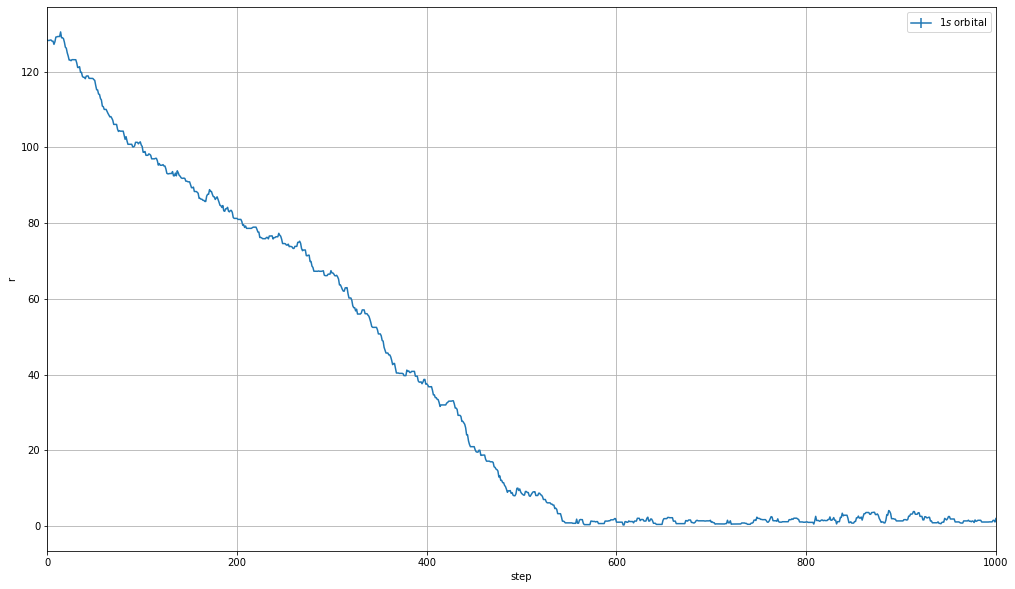

In [9]:
plt.figure(figsize=(17,10))
plt.errorbar(np.arange(N*L), data_far_100['r'], yerr=0, alpha=1.0, label='$1s$ orbital')
plt.xlabel('step')
plt.ylabel('r')
plt.xlim((0,1000)) #plot the first 1000 steps
plt.grid(True)
plt.legend()
plt.show()

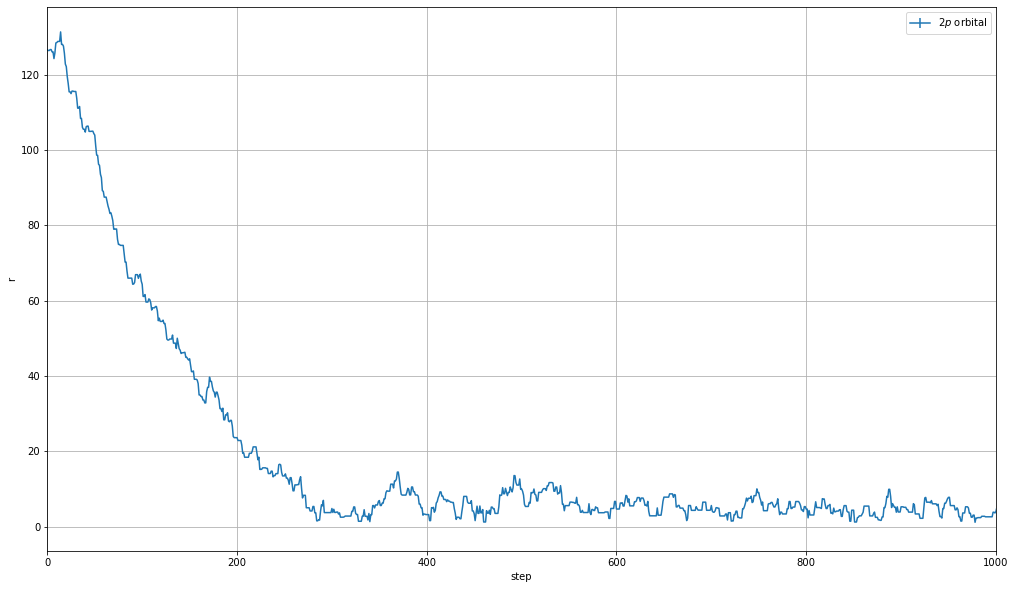

In [10]:
plt.figure(figsize=(17,10))
plt.errorbar(np.arange(N*L), data_far_210['r'], yerr=0, alpha=1.0, label='$2p$ orbital')
plt.xlabel('step')
plt.ylabel('r')
plt.xlim((0,1000)) #plot the first 1000 steps
plt.grid(True)
plt.legend()
plt.show()

From the graphs above it is evident that the value of $r$ decreases as the random walk proceeds and then settles around a fixed value, which is the number I want to measure. But how to quantify this observation? To verify that the $r$ has settled, and that the system is in equilibrium, I will use a moving average and, in particular, the standard deviation of the moving average. Using a large enough window (let's say 100 steps), I can be reasonably sure that, once equilibrium has been reached, all of the 100 values of $r$ in the window are in close proximity of the same value, which is the number I want to measure. 

Now, the proposed moves are generated by sampling uniformly a cube of side $2a$ (where $a$ is the step length). The average distance from the center of a point in the unit cube is:

$$ A = \int_{\frac 1 2}^{\frac 1 2} \text d x \int_{\frac 1 2}^{\frac 1 2} \text d y \int_{\frac 1 2}^{\frac 1 2} \text d z \, \sqrt{x^2 + y^2 + z^2} \approx 0.5$$

which means the average length of a proposed move is $\approx a$. 

With this knowledge, a reasonably good approach is to ask for the standard deviation of the moving average to be smaller then $a$. This is a bit of a rule of thumb, as there's no profound mathematical justification, however it seems reasonable to expect that a system far from equilibrium hardly satisfies such a condition.

In [11]:
data_far_100['mv_avg'] = data_far_100['r'].rolling(100).mean()
data_far_100['mv_var'] = data_far_100['r'].rolling(100).var()
data_far_100['mv_std'] = np.sqrt(data_far_100['mv_var'])

eq_time_1s = data_far_100[data_far_100.mv_std < 1.3].index[0]
print("Equilibration steps for the 1s orbital: ", eq_time_1s)

data_far_210['mv_avg'] = data_far_210['r'].rolling(100).mean()
data_far_210['mv_var'] = data_far_210['r'].rolling(100).var()
data_far_210['mv_std'] = np.sqrt(data_far_210['mv_var'])

eq_time_2p = data_far_210[data_far_210.mv_std < 2.8].index[0]
print("Equilibration steps for the 2p orbital: ", eq_time_2p)

Equilibration steps for the 1s orbital:  629
Equilibration steps for the 2p orbital:  357


Using this method, I can say that the system is in equilibrium after about 600 steps in the case of the $1s$ orbital and after about 300 steps in the case of the $2p$ orbital.

Finally, I have redone the experiment using a multivariate normal transition probability. Again, starting from the origin (and therefore ignoring the equilibration issue), I did 50 mock trials for each orbital to find an appropriate step length (which in this case is simply the width of the gaussian curve) and then simulated the two random walks, each one million steps long and divided in the usual 1000 blocks.

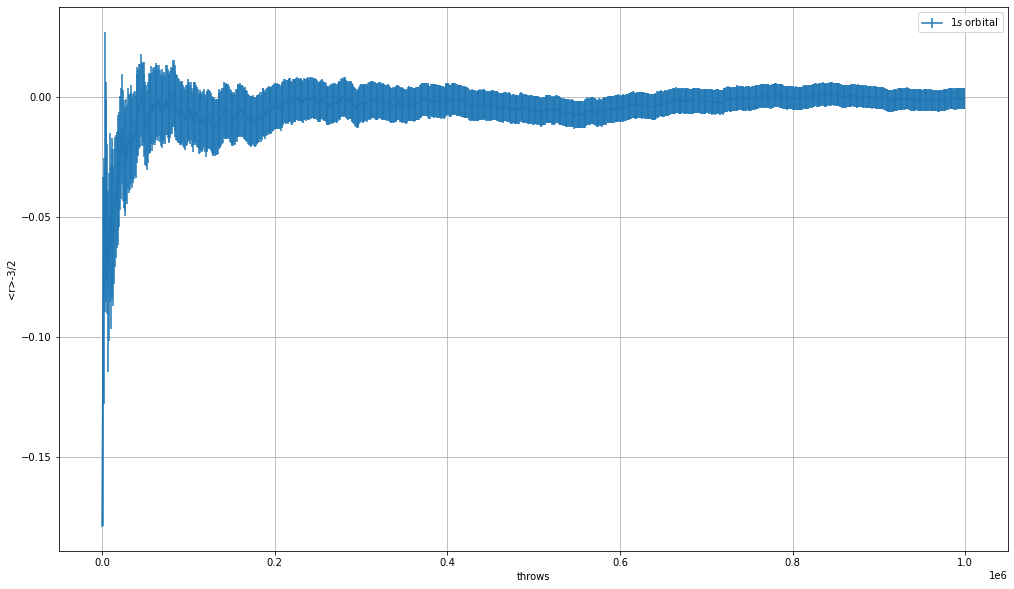

In [12]:
data_gauss = pd.read_csv('output_gauss.dat', delimiter='\t', header=None, names=['s', 's_sigma', 'p', 'p_sigma'])
data_gauss_100 = pd.read_csv('output_100_gauss.dat', delimiter='\t', header=None, names=['x', 'y', 'z', 'r'])
data_gauss_210 = pd.read_csv('output_210_gauss.dat', delimiter='\t', header=None, names=['x', 'y', 'z', 'r'])

plt.figure(figsize=(17,10))
plt.errorbar(x, data_gauss['s'] - 1.5, yerr=data_gauss['s_sigma'], alpha=1.0, label='$1s$ orbital')
plt.xlabel('throws')
plt.ylabel('<r>-3/2')
plt.grid(True)
plt.legend()
plt.show()

with step length $0.8$

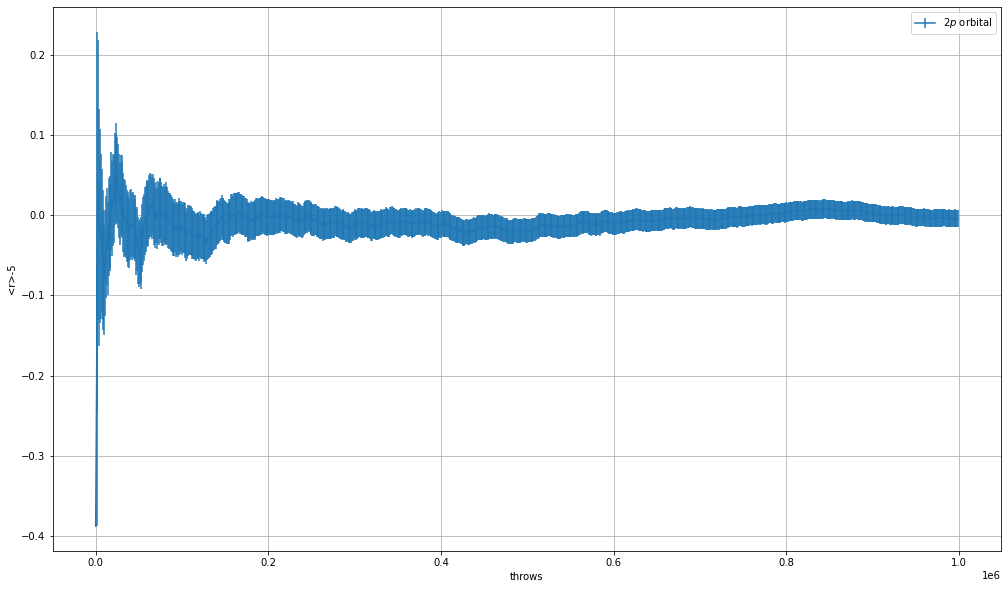

In [13]:
plt.figure(figsize=(17,10))
plt.errorbar(x, data_gauss['p'] - 5, yerr=data_gauss['p_sigma'], alpha=1.0, label='$2p$ orbital')
plt.xlabel('throws')
plt.ylabel('<r>-5')
plt.grid(True)
plt.legend()
plt.show()

with step length $1.9$

Both results are perfectly compatible both with the results obtained in the first case and with the theoretical values. The orbitals also have a similar appearance:

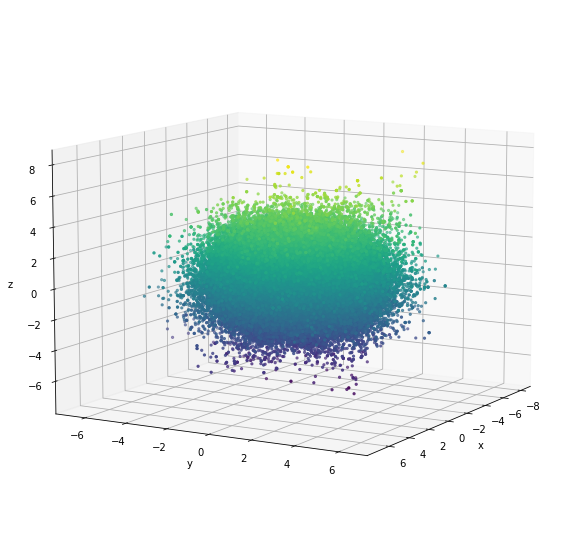

In [14]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_gauss_100['x'], data_gauss_100['y'], data_gauss_100['z'], c=data_gauss_100['z'], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

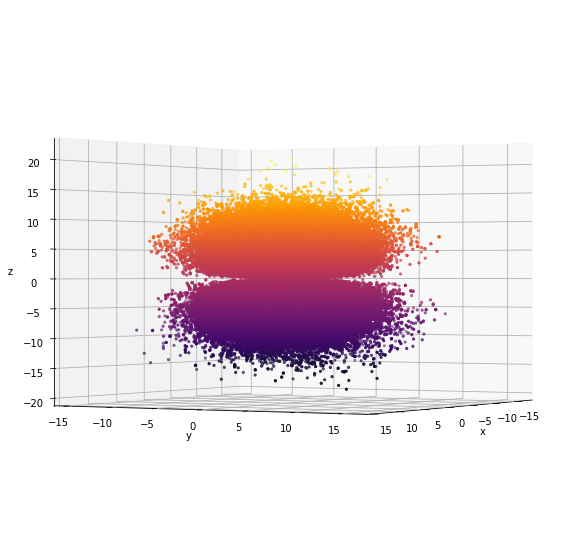

In [15]:
fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_gauss_210['x'], data_gauss_210['y'], data_gauss_210['z'], c=data_gauss_210['z'], cmap='inferno', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30)

plt.show()